Problem 2: Logistic Regression and LDA

You are hired by a tour and travel agency which deals in selling holiday packages. 
You are provided details of 872 employees of a company. Among these employees, some 
opted for the package and some didn't. You have to help the company in predicting whether
an employee will opt for the package or not on the basis of the information given in the data set. Also, 
find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

# Importing all required Libraries


In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix

# Loading the Data

In [72]:
hp=pd.read_csv("Holiday_Package.csv")

# Checking the data

In [73]:
hp.shape

(872, 8)

In [74]:
hp.dtypes

Unnamed: 0            int64
Holliday_Package     object
Salary                int64
age                   int64
educ                  int64
no_young_children     int64
no_older_children     int64
foreign              object
dtype: object

In [75]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [ ]:
Holliday_Package is the target variable while all others are the predictors. 
Out of the 8 columns, 2 are object type, while remaining 6 are int.
Nominal variables are 2: Holliday_Package, foreign 
Numeric variables are 5: Unnamed: 0, Salary,age,educ,no_young_children,no_older_children
It seems there are no missing values in the dataset.

In [76]:
# variable Unnamed is not necessary for model building, hence we drop them
hp=hp.drop("Unnamed: 0", axis=1)

# Check for missing values in any column


In [217]:
#hp.isnull()

In [77]:
hp.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [ ]:
It is evident that there are no null values in the dataset

# Checking for duplicates


In [78]:
# Are there any duplicates ?
dups = hp.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
hp[dups]

Number of duplicate rows = 0


,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign


# Summary of the data

In [79]:
hp.describe(include="all")

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
count,872,872.000000,872.000000,872.000000,872.000000,872.000000,872
unique,2,NaN,NaN,NaN,NaN,NaN,2
top,no,NaN,NaN,NaN,NaN,NaN,no
freq,471,NaN,NaN,NaN,NaN,NaN,656
mean,NaN,47729.172018,39.955275,9.307339,0.311927,0.982798,NaN
std,NaN,23418.668531,10.551675,3.036259,0.612870,1.086786,NaN
min,NaN,1322.000000,20.000000,1.000000,0.000000,0.000000,NaN
25%,NaN,35324.000000,32.000000,8.000000,0.000000,0.000000,NaN
50%,NaN,41903.500000,39.000000,9.000000,0.000000,1.000000,NaN
75%,NaN,53469.500000,48.000000,12.000000,0.000000,2.000000,NaN


From the above results, mean values are greater than the median, except for no_of_older_children.
Thus data is skewed. Count value is 872 for all variables.
Top values for Holliday_package and foreign are 'no' and their occurence is 471 and 656 respectively.

In [80]:
hp.skew()#??

Salary               3.103216
age                  0.146412
educ                -0.045501
no_young_children    1.946515
no_older_children    0.953951
dtype: float64

# Univariate Analysis

# Geting unique counts of all Nominal Variables

In [81]:
categorical_column = [col for col in hp.columns if hp.dtypes[col] == 'object']
for column in hp[categorical_column]:
    print(column.upper(),': ',hp[column].nunique())
    print(hp[column].value_counts().sort_values())
    print('\n')

HOLLIDAY_PACKAGE :  2
yes    401
no     471
Name: Holliday_Package, dtype: int64


FOREIGN :  2
yes    216
no     656
Name: foreign, dtype: int64




Observation:
    'yes' is in lower % than 'no'

# Distplot and Box plot


Text(0.5, 1.0, ' no_older_children Distribution')

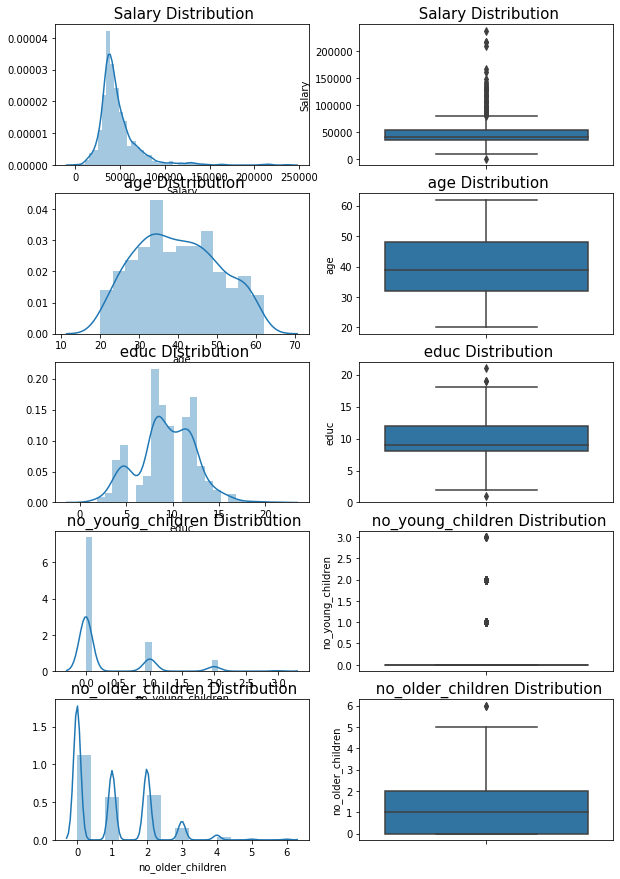

In [82]:
continuous_column = ['Salary','age','educ','no_young_children','no_older_children']
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(10, 15)
a = sns.distplot(hp['Salary'] , ax=axes[0][0])
a.set_title(" Salary Distribution",fontsize=15)
a = sns.boxplot(hp['Salary'] , orient = "v" , ax=axes[0][1])
a.set_title(" Salary Distribution",fontsize=15)

a = sns.distplot(hp['age'] , ax=axes[1][0])
a.set_title(" age Distribution",fontsize=15)
a = sns.boxplot(hp['age'] , orient = "v" , ax=axes[1][1])
a.set_title(" age Distribution",fontsize=15)

a = sns.distplot(hp['educ'] , ax=axes[2][0])
a.set_title(" educ Distribution",fontsize=15)
a = sns.boxplot(hp['educ'] , orient = "v" , ax=axes[2][1])
a.set_title(" educ Distribution",fontsize=15)

a = sns.distplot(hp['no_young_children'] , ax=axes[3][0], kde_kws={'bw':0.1})
a.set_title(" no_young_children Distribution",fontsize=15)
a = sns.boxplot(hp['no_young_children'] , orient = "v" , ax=axes[3][1])
a.set_title(" no_young_children Distribution",fontsize=15)

a = sns.distplot(hp['no_older_children'] , ax=axes[4][0], kde_kws={'bw':0.1})
a.set_title(" no_older_children Distribution",fontsize=15)
a = sns.boxplot(hp['no_older_children'] , orient = "v" , ax=axes[4][1])
a.set_title(" no_older_children Distribution",fontsize=15)

In [83]:
hp.skew()

Salary               3.103216
age                  0.146412
educ                -0.045501
no_young_children    1.946515
no_older_children    0.953951
dtype: float64

In [ ]:
#left-skewed data
#educ
#right-skewed data
#rem. 4
#All continuous varaibles have outliers.

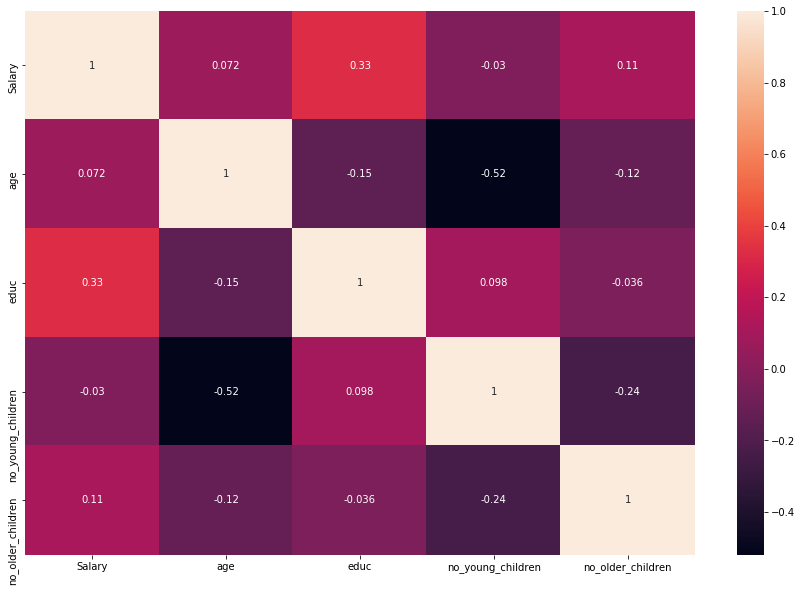

In [84]:
# Correlation matrix  
corr = hp[continuous_column].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);
plt.show()

#Below finding
# No correlation exists between the variables


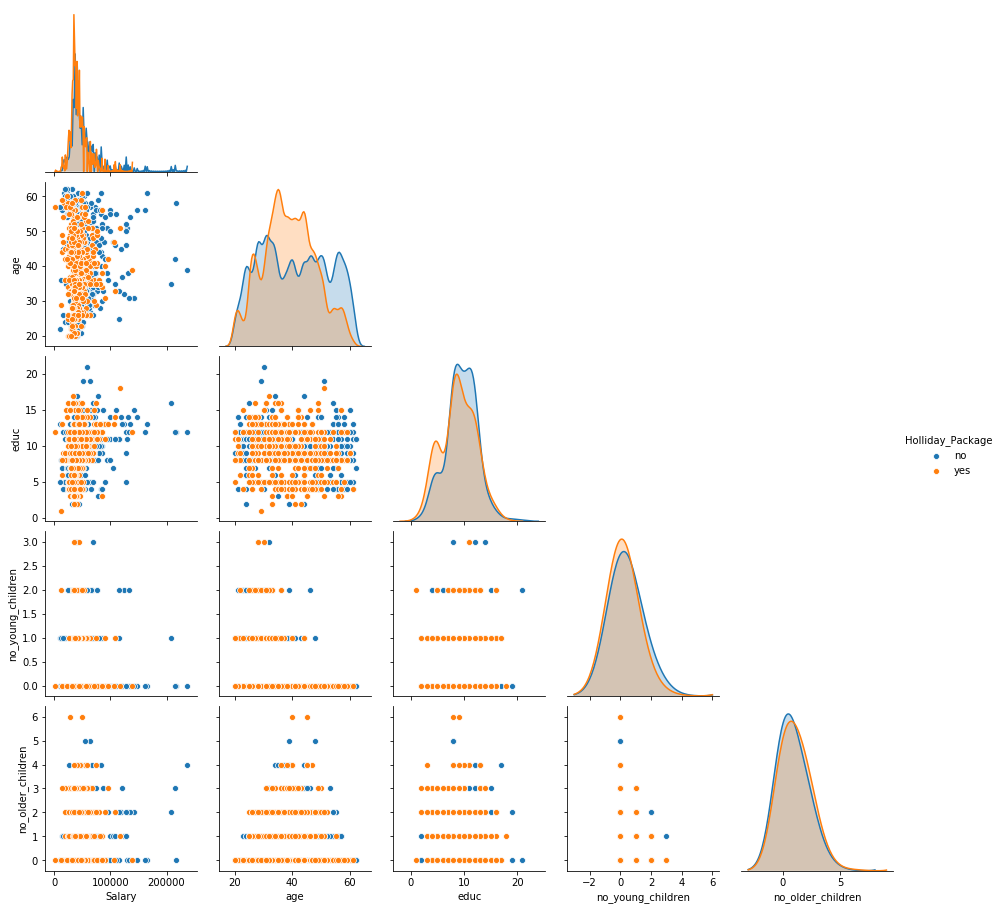

In [85]:
#Let us check for pair plots
sns.pairplot(hp,hue="Holliday_Package",diag_kind='kde',corner=True, diag_kws={'bw':1.0})

Outlier checks

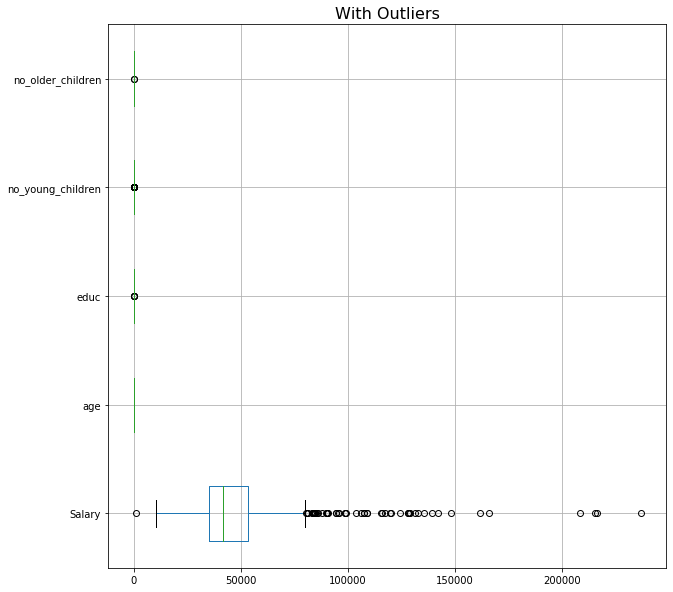

In [86]:
plt.figure(figsize=(10,10))
hp.boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [87]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [88]:
for column in hp.columns:
    if hp[column].dtype != 'object': 
        lr,ur=remove_outlier(hp[column])
        hp[column]=np.where(hp[column]>ur,ur,hp[column])
        hp[column]=np.where(hp[column]<lr,lr,hp[column])

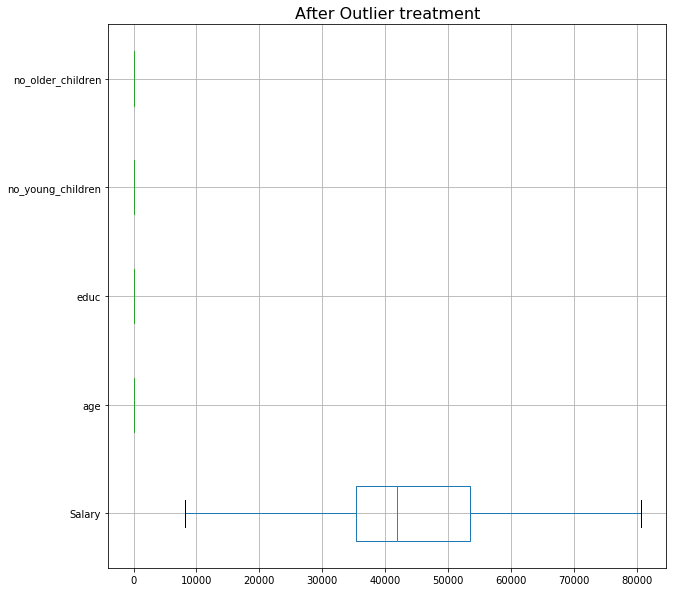

In [89]:
plt.figure(figsize=(10,10))
hp.boxplot(vert=0)
plt.title('After Outlier treatment',fontsize=16)
plt.show()

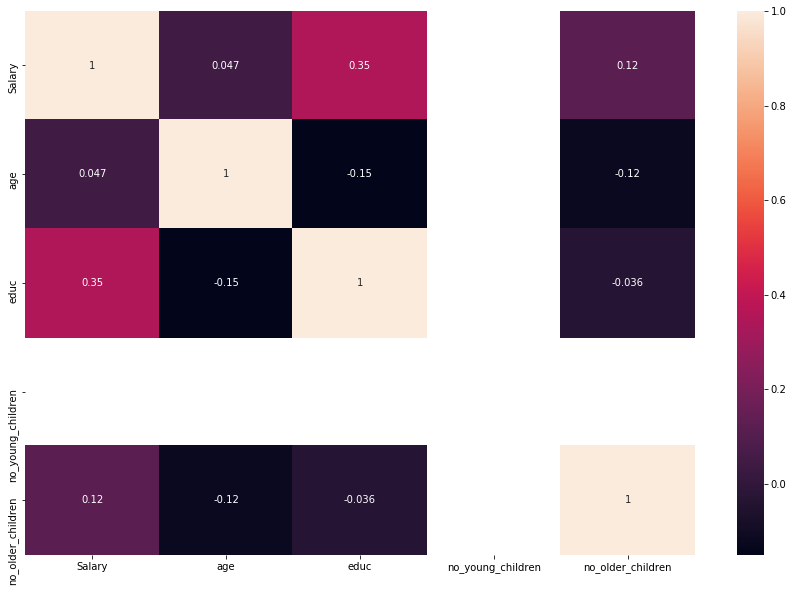

In [90]:
# Correlation matrix  
corr = hp[continuous_column].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);
plt.show()


In [91]:
hp.describe(include="all")

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
count,872,872.000000,872.000000,872.000000,872.0,872.000000,872
unique,2,NaN,NaN,NaN,NaN,NaN,2
top,no,NaN,NaN,NaN,NaN,NaN,no
freq,471,NaN,NaN,NaN,NaN,NaN,656
mean,NaN,45608.336869,39.955275,9.302752,0.0,0.980505,NaN
std,NaN,15699.745151,10.551675,3.014712,0.0,1.077197,NaN
min,NaN,8105.750000,20.000000,2.000000,0.0,0.000000,NaN
25%,NaN,35324.000000,32.000000,8.000000,0.0,0.000000,NaN
50%,NaN,41903.500000,39.000000,9.000000,0.0,1.000000,NaN
75%,NaN,53469.500000,48.000000,12.000000,0.0,2.000000,NaN


In [ ]:
 # The values of no_young_children are 0 after removing outliers. This variable can be dropped

In [92]:
hp=hp.drop("no_young_children", axis=1)

Proportion in the Target classes

In [93]:
hp.Holliday_Package.value_counts(normalize=True)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

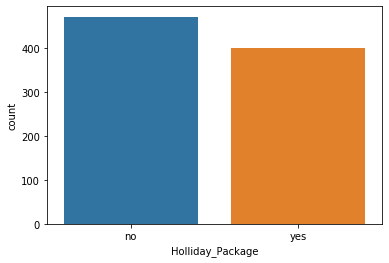

In [94]:
x=hp['Holliday_Package']
ax=sns.countplot(x=x,data=hp)

class imbalance is moderate

#defining a normalisation function 
def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))
                                            
hp = hp.apply(normalize)
hp.head()

In [95]:
#Converting all objects to categorical codes
for feature in hp.columns: 
    if hp[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(hp[feature].unique()))
        print(pd.Categorical(hp[feature].unique()).codes)
        hp[feature] = pd.Categorical(hp[feature]).codes



feature: Holliday_Package
[no, yes]
Categories (2, object): [no, yes]
[0 1]


feature: foreign
[no, yes]
Categories (2, object): [no, yes]
[0 1]


# Train Test split

In [96]:
# Copy all the predictor variables into X dataframe
X = hp.drop('Holliday_Package', axis=1)

# Copy target into the y dataframe. 
y = hp['Holliday_Package']

In [97]:
X.head()

,Salary,age,educ,no_older_children,foreign
0,48412.0,30.0,8.0,1.0,0
1,37207.0,45.0,8.0,1.0,0
2,58022.0,46.0,9.0,0.0,0
3,66503.0,31.0,11.0,0.0,0
4,66734.0,44.0,12.0,2.0,0


In [98]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)


# Checking the dimensions of the training and test data

In [99]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (610, 5)
X_test (262, 5)
y_train (610,)
y_test (262,)


# Logistic Regression Model

In [100]:
# Fit the Logistic Regression model
lgr = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
lgr.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    3.1s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=2, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001,
                   verbose=True, warm_start=False)

# Predicting on Training and Test dataset


In [101]:
ytrain_predict = lgr.predict(X_train)
ytest_predict = lgr.predict(X_test)

# Getting the Predicted Classes and Probs

In [102]:
ytest_predict_prob=lgr.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.696807,0.303193
1,0.332213,0.667787
2,0.620128,0.379872
3,0.686886,0.313114
4,0.354964,0.645036


# Model Evaluation

In [106]:
# Accuracy - Training Data
lgr_train_acc=lgr.score(X_train, y_train)
print("Accuracy score of training data is",lgr_train_acc)

Accuracy score of training data is 0.6409836065573771


# AUC and ROC for the training data

AUC-ROC of training data: 0.667


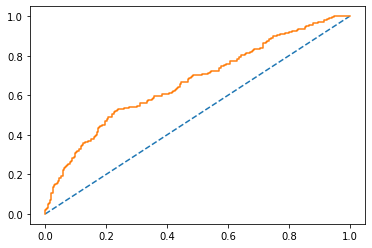

In [119]:
# predict probabilities
probs = lgr.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC-ROC of training data: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [109]:
# Accuracy - Test Data
lgr_test_acc=lgr.score(X_test, y_test)
print("Accuracy score of test data is",lgr_test_acc)

Accuracy score of test data is 0.6297709923664122


# AUC and ROC for the test data


AUC-ROC of test data: 0.667


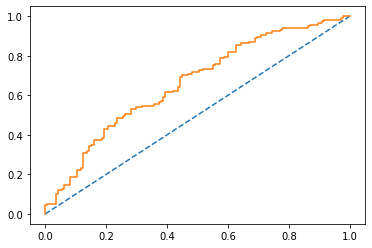

In [120]:
# predict probabilities
probs = lgr.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC-ROC of test data: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

# Confusion Matrix for the training data


In [111]:
confusion_matrix(y_train, ytrain_predict)

array([[265,  61],
       [158, 126]], dtype=int64)

In [112]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.63      0.81      0.71       326
           1       0.67      0.44      0.54       284

    accuracy                           0.64       610
   macro avg       0.65      0.63      0.62       610
weighted avg       0.65      0.64      0.63       610



In [113]:
lgr_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(lgr_metrics).transpose()
lgr_train_precision=round(df.loc["1"][0],2)
lgr_train_recall=round(df.loc["1"][1],2)
lgr_train_f1=round(df.loc["1"][2],2)
print ('lgr_train_precision ',lgr_train_precision)
print ('lgr_train_recall ',lgr_train_recall)
print ('lgr_train_f1 ',lgr_train_f1)

lgr_train_precision  0.67
lgr_train_recall  0.44
lgr_train_f1  0.54


Area under Curve is 0.628272703706904


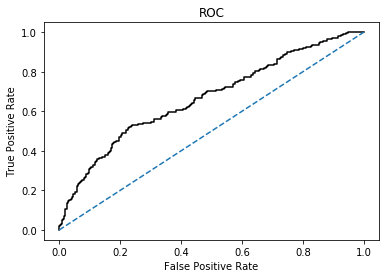

In [114]:
lgr_train_fpr, lgr_train_tpr,_=roc_curve(y_train,lgr.predict_proba(X_train)[:,1])
plt.plot(lgr_train_fpr,lgr_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
lgr_train_auc=roc_auc_score(y_train,lgr.predict(X_train))
print('Area under Curve is', lgr_train_auc)

# Confusion Matrix for the test data


In [115]:
cnf_matrix=confusion_matrix(y_test, ytest_predict)
cnf_matrix

array([[113,  32],
       [ 65,  52]], dtype=int64)

In [116]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.63      0.78      0.70       145
           1       0.62      0.44      0.52       117

    accuracy                           0.63       262
   macro avg       0.63      0.61      0.61       262
weighted avg       0.63      0.63      0.62       262



In [117]:
lgr_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(lgr_metrics).transpose()
lgr_test_precision=round(df.loc["1"][0],2)
lgr_test_recall=round(df.loc["1"][1],2)
lgr_test_f1=round(df.loc["1"][2],2)
print ('lgr_test_precision ',lgr_test_precision)
print ('lgr_test_recall ',lgr_test_recall)
print ('lgr_test_f1 ',lgr_test_f1)

lgr_test_precision  0.62
lgr_test_recall  0.44
lgr_test_f1  0.52


Area under Curve is 0.6118773946360153


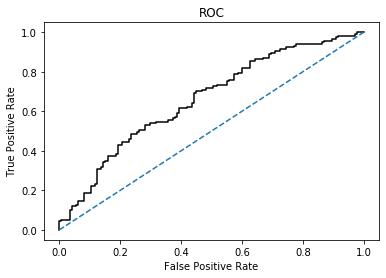

In [118]:
lgr_test_fpr, lgr_test_tpr,_=roc_curve(y_test,lgr.predict_proba(X_test)[:,1])
plt.plot(lgr_test_fpr,lgr_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
lgr_test_auc=roc_auc_score(y_test,lgr.predict(X_test))
print('Area under Curve is', lgr_test_auc)

# Conclusion

In [ ]:
Accuracy on Test data is 63% and on Train data is 64%.
AUC-ROC score of test data is 61% and train data is 67%.
Recall and Precision is low and same on both data.
While the model results between training and test sets are similar, indicating no under or overfitting issues, 
overall prediction of the model is weaker in terms of predicting Holliday_Package = 1. Considering
the class imabalance ratio is moderate and not high, with more training data, the model is expected to perform even better.

# Linear Discriminant Analysis(LDA) Model

In [175]:
lda = LinearDiscriminantAnalysis()
ldam=lda.fit(X_train,y_train)

In [176]:
ldam

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

# Predicting on Training and Test dataset


In [122]:
ytrain_predict = ldam.predict(X_train)
ytest_predict = ldam.predict(X_test)

# Getting the Predicted Classes and Probs

In [123]:
ytest_predict_prob=ldam.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.701405,0.298595
1,0.326676,0.673324
2,0.625464,0.374536
3,0.691134,0.308866
4,0.360268,0.639732


# Model Evaluation

In [126]:
# Accuracy - Training Data
ldam_train_acc=ldam.score(X_train, y_train)
print("Accuracy score of training data is",ldam_train_acc)

Accuracy score of training data is 0.6426229508196721


# AUC and ROC for the training data

AUC_ROC score of training data: 0.667


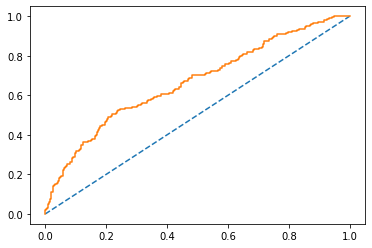

In [127]:
# predict probabilities
probs = ldam.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC_ROC score of training data: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [128]:
# Accuracy - Test Data
ldam_test_acc=ldam.score(X_test, y_test)
print("Accuracy score of test data is",ldam_test_acc)

Accuracy score of test data is 0.6297709923664122


# AUC and ROC for the test data


AUC-ROC score of test data: 0.667


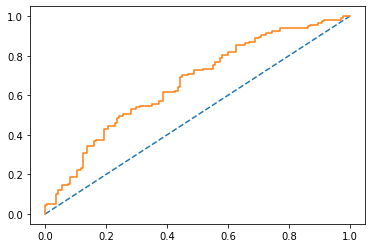

In [129]:
# predict probabilities
probs = ldam.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC-ROC score of test data: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

# Confusion Matrix for the training data


In [130]:
confusion_matrix(y_train, ytrain_predict)

array([[269,  57],
       [161, 123]], dtype=int64)

In [131]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.63      0.83      0.71       326
           1       0.68      0.43      0.53       284

    accuracy                           0.64       610
   macro avg       0.65      0.63      0.62       610
weighted avg       0.65      0.64      0.63       610



In [132]:
ldam_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(ldam_metrics).transpose()
ldam_train_precision=round(df.loc["1"][0],2)
ldam_train_recall=round(df.loc["1"][1],2)
ldam_train_f1=round(df.loc["1"][2],2)
print ('ldam_train_precision ',ldam_train_precision)
print ('ldam_train_recall ',ldam_train_recall)
print ('ldam_train_f1 ',ldam_train_f1)

ldam_train_precision  0.68
ldam_train_recall  0.43
ldam_train_f1  0.53


Area under Curve is 0.6291259828912122


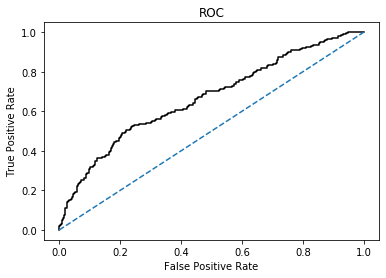

In [133]:
ldam_train_fpr, ldam_train_tpr,_=roc_curve(y_train,ldam.predict_proba(X_train)[:,1])
plt.plot(ldam_train_fpr,ldam_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
ldam_train_auc=roc_auc_score(y_train,ldam.predict(X_train))
print('Area under Curve is', ldam_train_auc)

# Confusion Matrix for the test data


In [134]:
cnf_matrix=confusion_matrix(y_test, ytest_predict)
cnf_matrix

array([[113,  32],
       [ 65,  52]], dtype=int64)

In [135]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.63      0.78      0.70       145
           1       0.62      0.44      0.52       117

    accuracy                           0.63       262
   macro avg       0.63      0.61      0.61       262
weighted avg       0.63      0.63      0.62       262



In [136]:
ldam_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(ldam_metrics).transpose()
ldam_test_precision=round(df.loc["1"][0],2)
ldam_test_recall=round(df.loc["1"][1],2)
ldam_test_f1=round(df.loc["1"][2],2)
print ('ldam_test_precision ',ldam_test_precision)
print ('ldam_test_recall ',ldam_test_recall)
print ('ldam_test_f1 ',ldam_test_f1)

ldam_test_precision  0.62
ldam_test_recall  0.44
ldam_test_f1  0.52


Area under Curve is 0.6118773946360153


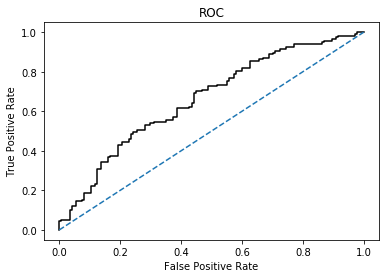

In [137]:
ldam_test_fpr, ldam_test_tpr,_=roc_curve(y_test,ldam.predict_proba(X_test)[:,1])
plt.plot(ldam_test_fpr,ldam_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
ldam_test_auc=roc_auc_score(y_test,ldam.predict(X_test))
print('Area under Curve is', ldam_test_auc)

# Conclusion

In [ ]:
Accuracy on Test data is 63% and on Train data is 64%.
AUC-ROC score of test data and train data are 67%.
Recall and Precision is low and almost same on both data.
While the model results between training and test sets are similar, indicating no under or overfitting issues, 
overall prediction of the model is weaker in terms of predicting Holliday_Package = 1. Considering
the class imabalance ratio is moderate and not high, with more training data, the model is expected to perform even better.

# Final Conclusion

# Comparison of the performance metrics from the 2 models

In [138]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Logistic Regression Train':[lgr_train_acc,lgr_train_auc,lgr_train_recall,lgr_train_precision,lgr_train_f1],
        'Logistic Regression Test':[lgr_test_acc,lgr_test_auc,lgr_test_recall,lgr_test_precision,lgr_test_f1],
        'LDA Train':[ldam_train_acc,ldam_train_auc,ldam_train_recall,ldam_train_precision,ldam_train_f1],
        'LDA Test':[ldam_test_acc,ldam_test_auc,ldam_test_recall,ldam_test_precision,ldam_test_f1]},index=index)
round(data,2)

,Logistic Regression Train,Logistic Regression Test,LDA Train,LDA Test
Accuracy,0.64,0.63,0.64,0.63
AUC,0.63,0.61,0.63,0.61
Recall,0.44,0.44,0.43,0.44
Precision,0.67,0.62,0.68,0.62
F1 Score,0.54,0.52,0.53,0.52


# ROC Curve for the 2 models on the Training data

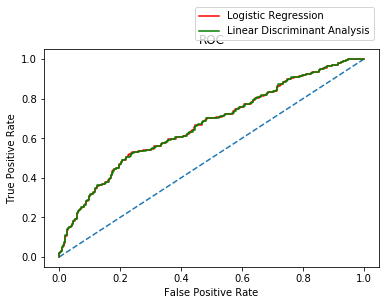

In [140]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lgr_train_fpr, lgr_train_tpr,color='red',label="Logistic Regression")
plt.plot(ldam_train_fpr,ldam_train_tpr,color='green',label="Linear Discriminant Analysis")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

# ROC Curve for the 2 models on the Test data

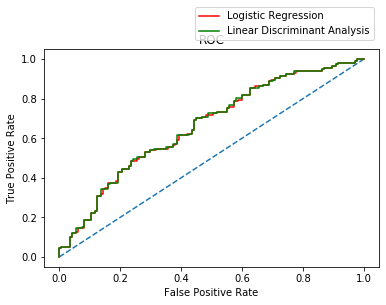

In [141]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lgr_test_fpr, lgr_test_tpr,color='red',label="Logistic Regression")
plt.plot(ldam_test_fpr,ldam_test_tpr,color='green',label="Linear Discriminant Analysis")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

In [165]:
X = hp.drop('Holliday_Package', axis=1)
y = hp['Holliday_Package']


In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [167]:
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
result=model.fit(X_train, y_train)
#model1=LinearDiscriminantAnalysis()
#result1=model1.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.2s finished


In [168]:
# Let us explore the coefficients for each of the independent attributes
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, result.coef_[0][idx]))

The coefficient for Salary is -1.8534326783574348e-05
The coefficient for age is -0.008975309472389897
The coefficient for educ is 0.06639476216408273
The coefficient for no_older_children is 0.18666758119768978
The coefficient for foreign is 1.3317806788235667


In [170]:
np.exp(result.coef_)

array([[0.99998147, 0.99106485, 1.0686485 , 1.20522658, 3.78778221]])

In [ ]:
# important features are same for Logistic Regression and LDA model using coeffiecients.

# Important features are educ, no_older_children, foreign

In [171]:
# verifying with test data
cols=['educ','no_older_children','foreign']
X=hp[cols]
y = hp['Holliday_Package']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=7)
#model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model=LinearDiscriminantAnalysis()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.6450381679389313
[[115  23]
 [ 70  54]]
              precision    recall  f1-score   support

           0       0.62      0.83      0.71       138
           1       0.70      0.44      0.54       124

    accuracy                           0.65       262
   macro avg       0.66      0.63      0.62       262
weighted avg       0.66      0.65      0.63       262



Final Conclusion
The model accuracy is 65%, which is almost the same value as the number of class 0 observations in the dataset. 
The higher precision and lower recall value supports this statement. i.e model is only able to correctly predict 
44% of the class 1 cases . This confirms the model is affected by class imbalance problem. Since, we have only 
872 observations, if re-build the same logistic regression and LDA model with more number of data, an even better
model could be built.
Alternatively, Decision Trees,Random Forest and Neural network models can also be used on this dataset to build
the predictive model and choose the model which gives a better performance result.

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

X = hp.drop('Holliday_Package', axis=1)
y = hp['Holliday_Package']
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=123,test_size=0.30)
ss=StandardScaler() 
#we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
x_train_scaled=ss.fit_transform(x_train)
x_test_scaled=ss.transform(x_test)


annr = MLPRegressor(hidden_layer_sizes=(500),random_state=123, max_iter=10000)#you are free to tweak the layer sizes
rfr = RandomForestRegressor(random_state=123)
dtr = tree.DecisionTreeRegressor(random_state=123)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

for i in models:  # we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
    
    if (i != annr) :
        i.fit(x_train,y_train)
        scores_train.append(i.score(x_train, y_train))
        scores_test.append(i.score(x_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
 
    else :
        i.fit(x_train_scaled,y_train)
        scores_train.append(i.score(x_train_scaled, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test_scaled))))
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))